<div style="text-align:center;">
  <img src="../assets/header1.png" alt="Header" style="width:50%; max-width:100%; ">
</div>

---
### Context

> Coursera is a global online learning platform where people can take courses (and sometimes full programs) from universities and industry partners.  
It offers different learning formats like individual courses, specializations, professional certificates, and even degrees, and it makes things easy for students - pick a skill, pick a path, start learning.

<ul>
  <li>Total Registered Learners: 191 million (as of Q3 2025)</li>
  <li>Approximately 46% of the global learner base is female</li>
  <li>Revenue in the range of $750 to $754 million (2025 projected)</li>
  <li>Massive surge in 2025, largely driven by the demand for Artificial Intelligence (AI) skills</li>
  <li>Top skills of 2025: AI Literacy, Data Science, Soft skills</li>
</ul>

---
### Problem
> Online learning platforms have *a lot* of content. As a learner, I want courses that are actually worth my time.  
As a provider, you want to understand what people enroll in and what tends to get better ratings.

---
### Goal

>Use exploratory data analysis (EDA) and visualizations to spot patterns in:
- **Popularity** (enrollment)
- **Perceived quality** (ratings)
- How these relate to course attributes like **difficulty**, **organization**, and **certificate type**


---
### Dataset

- **Date:** — 2020-05-25
- **Source:** — <a href="https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset">Coursera course dataset</a>

>This dataset contains basic metadata about Coursera courses:

- **course_title** — course name  
- **course_organization** — the organization providing the course  
- **course_Certificate_type** — the type of credential/format (e.g., Course, Specialization, etc.)  
- **course_rating** — average course rating  
- **course_difficulty** — difficulty level (Beginner/Intermediate/Advanced/Mixed)  
- **course_students_enrolled** — number of enrolled students

---
### Setup
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", 120)

sns.set_theme(style="whitegrid")

---
### Data load
---

In [ ]:
df_og = pd.read_csv("../data/coursea_data.csv", index_col=0)
df_og.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


---
### Data inspection
---

> **Goal:** To understand how many features and samples dataset has

In [ ]:
print("Shape:", df_og.shape)

Shape: (891, 6)


> **Result:** The dataset has 891 rows (samples) and 6 columns (features) <br>
> **Meaning:** We now know with how big dataset we are working with
---

> **Goal:** Preview the first few rows to understand content and formatting

In [ ]:
df_og.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


> **Result:** First 5 rows of dataset records and how values are stored (e.g., "5.3k") <br>
> **Meaning:** We now have an overview of the data and it's structure
---

> **Goal:** Preview the last few rows to understand content and formatting

In [ ]:
display(df_og.tail())

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k
163,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


> **Result:** Non-English characters revealed with similar formatting patterns as in first few rows <br>
> **Meaning:** Dataset includes multilingual text and follows
---

> **Goal:** Identify dtypes, non-null counts, and memory usage

In [ ]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


> **Result:** coursera_rating is numeric, most other columns are object, no missing values <br>
> **Meaning:** Enrollment column needs parsing (object), and other columns are good candidates for category/string dtype
---

> **Goal:** Measure how repetitive each column is

In [ ]:
df_og.nunique().to_frame("unique_values")

,unique_values
course_title,888
course_organization,154
course_Certificate_type,3
course_rating,14
course_difficulty,4
course_students_enrolled,205


> **Result:** Title is mostly unique, other columns have fewer unique values<br>
> **Meaning:** Low-unique columns are ideal for category, titles are better as string dtype
---

> **Goal:** Detect duplicated rows with subset of "course_title" or duplicate column names

In [ ]:
print("There are", df_og.duplicated(subset=["course_title"]).sum(), "duplicated samples (rows)")
print("There are", df_og.columns.duplicated().sum(), "duplicated features (columns)")

There are 3 duplicated samples (rows)
There are 0 duplicated features (columns)


> **Result:** 3 rows have the same course_title and 0 columns are duplicated<br>
> **Meaning:** Further inspection on duplicates is necessary to understand whether to remove them
---

> **Goal:** To inspect all rows where "course_title" appears more than once, so we can understand if they're real duplicates or just reused titles

In [ ]:
dupe_titles = df_og.loc[df_og.duplicated(subset=["course_title"], keep=False)]
dupe_titles.sort_values("course_title")

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41k
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54k
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290k
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81k
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39k


> **Result:** Output shows 3 duplicate titles, each appearing twice<br>
> **Meaning:** These are not real duplicates that needs to be removed, they represent different course offerings, that share the same title
---

> **Goal:** Detect missing values

In [ ]:
df_og.isna().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

> **Result:** No missing values found<br>
> **Meaning:** We don't need to handle missing values at all

---
### Data validation, optimization and cleaning
---

>**Goal:** Create a working copy of the raw dataset to not alter the original data

In [ ]:
df = df_og.copy()

>**Result:** df becomes idenpendent copy of original dataset that we can modify safely<br>
>**Meaning:** We can compare "before vs after" and recover if something goes wrong
---

> **Goal:** To make working DataFrame index clean and consistent and validate results

In [ ]:
df = df.reset_index(drop=True)
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


> **Result:** Index is reset and no longer shows inconsistent old dataset CSV row numbers<br>
> **Meaning:** Outputs are easier to read, data is more reliable
---

>**Goal:** Convert columns to more suitable data types and save memory usage

In [ ]:
df["course_title"] = df["course_title"].astype("string")

for col in ["course_organization", "course_Certificate_type", "course_difficulty"]:
    df[col] = df[col].astype("category")

df["course_rating"] = df["course_rating"].astype("float32")

>**Result:** Text columns are converted to strings, repeated value columns are converted to category, rating column converted to float32<br>
>**Meaning:** This makes the dataset more memory efficient
---

> **Goal:** Identify non-numeric characters that appears in "course_students_enrolled"

In [ ]:
non_numeric = (
    df_og["course_students_enrolled"]
    .astype(str)
    .str.findall(r"[A-Za-z]+")
    .str.join("")
    .str.lower()
)

non_numeric.value_counts(dropna=False)


course_students_enrolled
k    887
m      4
Name: count, dtype: int64

> **Result:** Column contains only two abbreviations k (thousands) and m (millions)<br>
> **Meaning:** Enrollment counts are abbreviated, so it needs parsing, that it could be used as a continuos feature
---

>**Goal:** A fuction that converts the course_students_enrolled column values from text like 5.3k, 130k, 1.2m into numeric values that we could analyze and plot

In [ ]:
def parse_enrollment(x):
    x = str(x).strip().lower().replace(",", "")
    if x.endswith("k"):
        return int(float(x[:-1]) * 1_000)
    if x.endswith("m"):
        return int(float(x[:-1]) * 1_000_000)
    return int(float(x))

>**Result:** Reusable function that normalizes values, detects abbreviations, converts result into plain integer<br>
>**Meaning:** After parsing, we can treat values as a real numeric feature, making it valid for data analysis
---

>**Goal:** Parse and convert enrollment values into numeric column (int32)

In [ ]:
df["students_enrolled_parsed"] = df["course_students_enrolled"].apply(parse_enrollment).astype("int32")
df["students_enrolled_parsed"].head(10)


0      5300
1     17000
2    130000
3     91000
4    320000
5     39000
6    350000
7      2400
8     61000
9     12000
Name: students_enrolled_parsed, dtype: int32

>**Result:** New column "students_enrolled_parsed" is created as integers and validation shows correct values and dtypes<br>
>**Meaning:** Enrollment is now numeric feature suitable for analysis
---

> **Goal:** Remove the raw text-based enrollment column to avoid confusion

In [ ]:
df = df.drop(columns=["course_students_enrolled"])

> **Result:** Column is dropped, dataset keeps the parsed column only for analysis<br>
> **Meaning:** DataFrame is cleaner and safer to use for analysis
---

> **Goal:** Make category/string columns labels consistent and validate the results

In [ ]:
cat_cols = ["course_organization", "course_Certificate_type", "course_difficulty"]

for col in cat_cols:
    df[col] = (
        df[col]
        .astype("string")
        .str.strip()
        .str.replace(r"\s+", " ", regex=True)
    ).astype("category")

In [ ]:
for col in cat_cols:
    print(col, df[col].astype(str).str.contains(r"^\s|\s$", regex=True).any())

course_organization False
course_Certificate_type False
course_difficulty False


In [ ]:
for col in cat_cols:
    print(col, df[col].astype(str).str.contains(r"\s{2,}", regex=True).any())

course_organization False
course_Certificate_type False
course_difficulty False


In [ ]:
df["course_title"] = (
    df["course_title"]
    .astype("string")
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

In [ ]:
df["course_title"].str.contains(r"^\s|\s$", regex=True).any() 

np.False_

In [ ]:
df["course_title"].str.contains(r"\s{2,}", regex=True).any()

np.False_

> **Result:** Removed extra spacing, replace double spaces, confirmed cleaned columns results<br>
> **Meaning:** Cleaner, consistent labels, outputs are easier to read, data is more reliable
---

> **Goal:** To identify the memory usage before converting dtypes and cleaning

In [ ]:
before_mem = df_og.memory_usage(deep=True).sum()
print(f"Memory usage (before): {before_mem/1024:.2f} KB")

Memory usage (before): 307.17 KB


> **Result:** The full DataFrame currently uses ~307.17 KB of memory <br>
> **Meaning:** Baseline to compare against after we optimize data types, if memory decreases it will show clearly
---

> **Goal:** Measure the memory usage after dtype optimization, calculate how much memory was saved, and confirm column types were updated successfully

In [ ]:
after_mem = df.memory_usage(deep=True).sum()
print(f"Memory usage (after): {after_mem/1024:.2f} KB")
print(f"Saved: {(before_mem-after_mem)/1024:.2f} KB\n")

Memory usage (after): 104.24 KB
Saved: 202.93 KB



>**Result:** Memory dropped to 104.24 KB, saving 202.93 KB compared to the original<br>
>**Meaning:** Dataset is now more efficient to work with
---

> **Goal:** Save the cleaned dataset for reuse and reproducibility

In [ ]:
df.to_csv("../data/coursera_data_cleaned.csv", encoding="utf-8", index=False)

>**Result:** A cleaned file is exported into the project data/ folder<br>
>**Meaning:** Future analysis can start from clean data without need for cleaning again

---
### Exploratory data analysis
---

> In this section, I focus on eight questions to understand the dataset from three angles:
**catalog composition**, **course providers**, and **popularity/quality signals**.

**EDA questions:**
1. What’s the distribution of certificate types?
2. What's the enrollment by certificate types?
3. What’s the distribution of difficulty levels?
4. Which organizations publish the most courses (top 10)?
5. Which organizations have the highest total enrollment (top 10)?
6. Which organizations have the highest median enrollment per course?
7. Do ratings differ by difficulty?
8. Is there a relationship between rating and enrollment?
---


> **Goal:** Identify unusually high/low values that could distort averages and visualizations.

In [ ]:
num_cols = ["course_rating", "students_enrolled_parsed"]

outlier_summary = {}

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    mask = (df[col] < lower) | (df[col] > upper)
    outlier_summary[col] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "outlier_count": mask.sum(),
        "outlier_percent": round(mask.mean() * 100, 2),
    }

pd.DataFrame(outlier_summary).T


,lower_bound,upper_bound,outlier_count,outlier_percent
course_rating,4.299999,5.1,17.0,1.91
students_enrolled_parsed,-105500.000000,222500.0,78.0,8.75


> **Result:** Using the IQR rule, 17 courses (1.91%) are flagged as rating outliers (below ~4.3), and 78 courses (8.75%) are flagged as enrollment outliers (above ~222,500)<br>
> **Meaning:** Ratings are mostly stable and tightly clustered, while enrollments are much more skewed
---

> **Goal:** Inspect highest enrollment values

In [ ]:
df.nlargest(10, "students_enrolled_parsed")[["course_title", "course_organization", "students_enrolled_parsed", "course_rating"]]

,course_title,course_organization,students_enrolled_parsed,course_rating
564,Machine Learning,Stanford University,3200000,4.9
815,The Science of Well-Being,Yale University,2500000,4.9
688,Python for Everybody,University of Michigan,1500000,4.8
674,Programming for Everybody (Getting Started wit...,University of Michigan,1300000,4.8
196,Data Science,Johns Hopkins University,830000,4.5
129,Career Success,"University of California, Irvine",790000,4.4
261,English for Career Development,University of Pennsylvania,760000,4.8
765,Successful Negotiation: Essential Strategies a...,University of Michigan,750000,4.8
199,Data Science: Foundations using R,Johns Hopkins University,740000,4.6
211,Deep Learning,deeplearning.ai,690000,4.8


> **Result:** The top courses reach up to 3.2M enrollments (e.g., Machine Learning by Stanford), and the top 10 includes several widely known courses from major providers (Yale, Michigan, Johns Hopkins, deeplearning.ai)<br>
> **Meaning:** These values explains why enrollment distributions are skewed and why group averages can be misleading
---

> **Goal:** Inspect lowest ratings values

In [ ]:
df.nsmallest(10, "course_rating")[["course_title", "course_organization", "course_rating", "students_enrolled_parsed"]]

,course_title,course_organization,course_rating,students_enrolled_parsed
413,How To Create a Website in a Weekend! (Project...,The State University of New York,3.3,140000
566,Machine Learning and Reinforcement Learning in...,New York University,3.7,29000
569,Machine Learning for Trading,Google Cloud,3.9,15000
873,iOS App Development with Swift,University of Toronto,3.9,76000
522,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,4.0,13000
598,Mathematics for Machine Learning: PCA,Imperial College London,4.0,33000
414,How to Start Your Own Business,Michigan State University,4.1,34000
59,Aprende a programar con Python,Universidad Austral,4.2,6600
182,Cybersecurity and Its Ten Domains,University System of Georgia,4.2,140000
331,Foundations of Marketing Analytics,Emory University,4.2,27000


> **Result:** The lowest ratings range from about 3.3 to 4.2, and these courses still have meaningful enrollments (some >100k), showing that lower ratings don’t necessarily mean low demand<br>
> **Meaning:** Ratings are generally high overall, but a small number of courses still score as low as 3.3
---

> **Goal:** To see how dataset is split across certificate types

In [ ]:
q1_cert_counts = df["course_Certificate_type"].value_counts()
q1_cert_pct = df["course_Certificate_type"].value_counts(normalize=True).mul(100).round(1)

q1_cert_summary = (
    pd.DataFrame({"count": q1_cert_counts, "percent": q1_cert_pct})
    .reset_index()
    .rename(columns={"index": "course_Certificate_type"})
)

q1_cert_summary


,course_Certificate_type,count,percent
0,COURSE,582,65.3
1,SPECIALIZATION,297,33.3
2,PROFESSIONAL CERTIFICATE,12,1.3


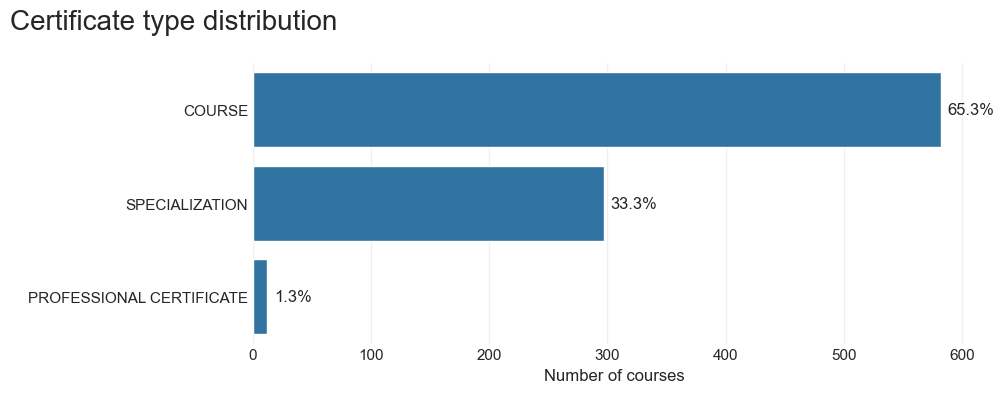

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, y="course_Certificate_type", order=q1_cert_counts.index, color="#1f77b4")

ax = plt.gca()
total = len(df)

for p in ax.patches:
    count = p.get_width()
    pct = 100 * count / total
    ax.annotate(f"{pct:.1f}%",
                (count, p.get_y() + p.get_height()/2),
                xytext=(5, 0),
                textcoords="offset points",
                va="center")
    
plt.suptitle("Certificate type distribution", fontsize=20, x=0, ha='left')
plt.xlabel("Number of courses")
plt.ylabel("")
ax.grid(axis="x", which="major", alpha=0.3)
ax.grid(axis="y", visible=False)
ax.tick_params(axis="both", length=0)
sns.despine(ax=ax, left=True, bottom=True)
plt.tight_layout()
plt.show()

>**Result:** Most entries are COURSE (65.3%), followed by SPECIALIZATION (33.3%), and only 1.3% are PROFESSIONAL CERTIFICATE<br>
>**Meaning:** Dataset is dominated by regular courses, comparisons by certificate type should be interpreted carefully - "Professional certificate" group is very small and can't support strong conclusions
---

> **Goal:** Compare course popularity across certificate types using enrollment (median/mean)

In [ ]:
q2_cert_type_summary = (
    df.groupby("course_Certificate_type", observed=False)["students_enrolled_parsed"]
      .agg(courses="count", median_enroll="median", mean_enroll="mean")
      .round(0)
      .sort_values("median_enroll", ascending=False)
)

q2_cert_type_summary

,courses,median_enroll,mean_enroll
course_Certificate_type,,,
PROFESSIONAL CERTIFICATE,12,145000.0,190700.0
COURSE,582,43000.0,87854.0
SPECIALIZATION,297,38000.0,91792.0


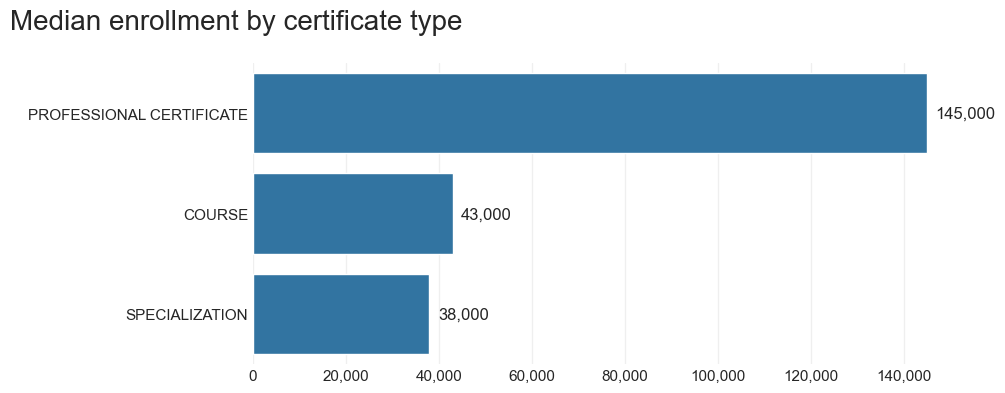

In [ ]:
plot_df = q2_cert_type_summary.reset_index()
order = plot_df.sort_values("median_enroll", ascending=False)["course_Certificate_type"]

plt.figure(figsize=(10,4))
sns.barplot(data=plot_df, y="course_Certificate_type", x="median_enroll", order=order, color="#1f77b4")

ax = plt.gca()
for p in ax.patches:
    val = p.get_width()
    ax.annotate(f"{val:,.0f}", (val, p.get_y() + p.get_height()/2),
                xytext=(6, 0), textcoords="offset points", va="center")

plt.suptitle("Median enrollment by certificate type", fontsize=20, x=0, ha="left")
plt.xlabel("")
plt.ylabel("")
ax.grid(axis="x", which="major", alpha=0.3)
ax.grid(axis="y", visible=False)
ax.tick_params(axis="both", length=0)
sns.despine(ax=ax, left=True, bottom=True)
ax.ticklabel_format(style="plain", axis="x")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()


>**Result:** Professional Certificate has highest typical enrollment (median ~145, mean ~191k) but ONLY 12 entries, courses have median ~43 (mean ~87.9k) across 582 entries and specialization have median ~38k (mean ~91.8k) across 297 entries<br>
>**Meaning:** Professional Certificates appear more popular in this sample, but because the group is very small, definite conclusions can't be made. Larger groups (courses vs specializations), enrollments are fairly similar, Courses slightly higher by median
---

> **Goal:** Understand the distribution of course difficulty levels in the dataset

In [ ]:
q3_diff_counts = df["course_difficulty"].value_counts()
q3_diff_pct = df["course_difficulty"].value_counts(normalize=True).mul(100).round(1)

q3_diff_summary = (
    pd.DataFrame({"count": q3_diff_counts, "percent": q3_diff_pct})
    .reset_index()
    .rename(columns={"index": "course_difficulty"})
)

q3_diff_summary

,course_difficulty,count,percent
0,Beginner,487,54.7
1,Intermediate,198,22.2
2,Mixed,187,21.0
3,Advanced,19,2.1


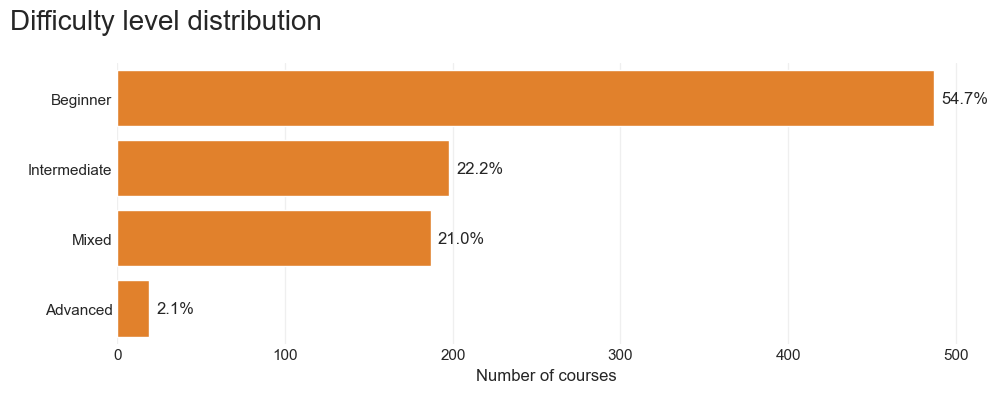

In [ ]:
diff_order = ["Beginner", "Intermediate", "Mixed", "Advanced"]

plt.figure(figsize=(10,4))
sns.countplot(data=df, y="course_difficulty", order=diff_order, color="#ff7f0e")

ax = plt.gca()
total = len(df)

for p in ax.patches:
    count = p.get_width()
    pct = 100 * count / total
    ax.annotate(f"{pct:.1f}%",
                (count, p.get_y() + p.get_height()/2),
                xytext=(5, 0),
                textcoords="offset points",
                va="center")

plt.suptitle("Difficulty level distribution", fontsize=20, x=0, ha="left")
plt.xlabel("Number of courses")
plt.ylabel("")
ax.grid(axis="x", which="major", alpha=0.3)
ax.grid(axis="y", visible=False)
ax.tick_params(axis="both", length=0)
sns.despine(ax=ax, left=True, bottom=True)
plt.tight_layout()
plt.show()

>**Result:** The dataset is mostly Beginner (54.7%), then Intermediate (22.2%) and Mixed (21.0%), with very few Advanced (2.1%) courses<br>
>**Meaning:** The courses catalog in this sample is strongly beginner-oriented. Learner demand patterns will likely be influenced by beginner difficulty courses
---

> **Goal:** Identify top 10 organizations that makes the most courses in this dataset

In [ ]:
q4_org_counts = df["course_organization"].value_counts()

q4_org_top = q4_org_counts.head(10)
q4_org_top_pct = (q4_org_top / len(df) * 100).round(1)

q4_org_summary = (
    pd.DataFrame({"count": q4_org_top, "percent": q4_org_top_pct})
    .reset_index()
    .rename(columns={"index": "course_organization"})
)

q4_org_summary


,course_organization,count,percent
0,University of Pennsylvania,59,6.6
1,University of Michigan,41,4.6
2,Google Cloud,34,3.8
3,Johns Hopkins University,28,3.1
4,Duke University,28,3.1
5,"University of California, Irvine",27,3.0
6,University of Illinois at Urbana-Champaign,22,2.5
7,IBM,22,2.5
8,"University of California, Davis",21,2.4
9,University of Colorado Boulder,19,2.1


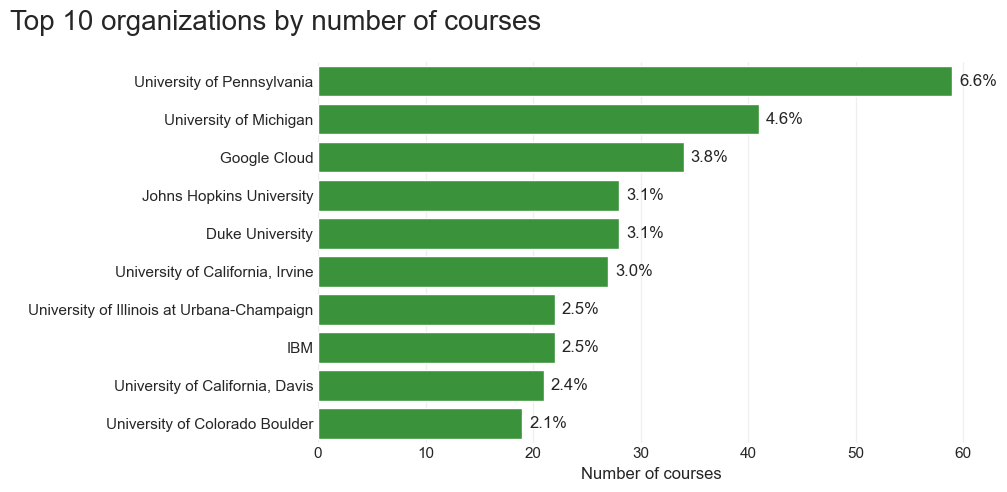

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="course_organization", order=q4_org_top.index, color="#2ca02c")

ax = plt.gca()
total = len(df)

for p in ax.patches:
    count = p.get_width()
    pct = 100 * count / total
    ax.annotate(f"{pct:.1f}%",
                (count, p.get_y() + p.get_height()/2),
                xytext=(5, 0),
                textcoords="offset points",
                va="center")

plt.suptitle("Top 10 organizations by number of courses", fontsize=20, x=0, ha="left")
plt.xlabel("Number of courses")
plt.ylabel("")
ax.grid(axis="x", which="major", alpha=0.3)
ax.grid(axis="y", visible=False)
ax.tick_params(axis="both", length=0)
sns.despine(ax=ax, left=True, bottom=True)
plt.tight_layout()
plt.show()


>**Result:** The largest contributor is "University of Pennsylvania with 6,6%, followed by University of Michigan with 4,6% and Google Cloud with 3,8%. The rest of the top 10 each contribute roughly 2-3% of courses<br>
>**Meaning:** The courses catalog is fairly decentralized - even top provider accounts for only 6.6%. This clarifies that courses providers are fairly distributed, and will help with the further analysis
---

> **Goal:** Identify top 10 organizations that attracts the most learners

In [ ]:
q5_top_n = 10

q5_org_enroll = (
    df.groupby("course_organization", observed=False)["students_enrolled_parsed"]
    .sum()
    .sort_values(ascending=False)
)

q5_org_enroll_top = q5_org_enroll.head(q5_top_n)
q5_org_enroll_top

course_organization
University of Michigan              7437700
University of Pennsylvania          5501300
Stanford University                 4854000
University of California, Irvine    4326000
Johns Hopkins University            4298900
Duke University                     3967600
Yale University                     3952000
IBM                                 2956400
deeplearning.ai                     2863400
Google Cloud                        2604300
Name: students_enrolled_parsed, dtype: int32

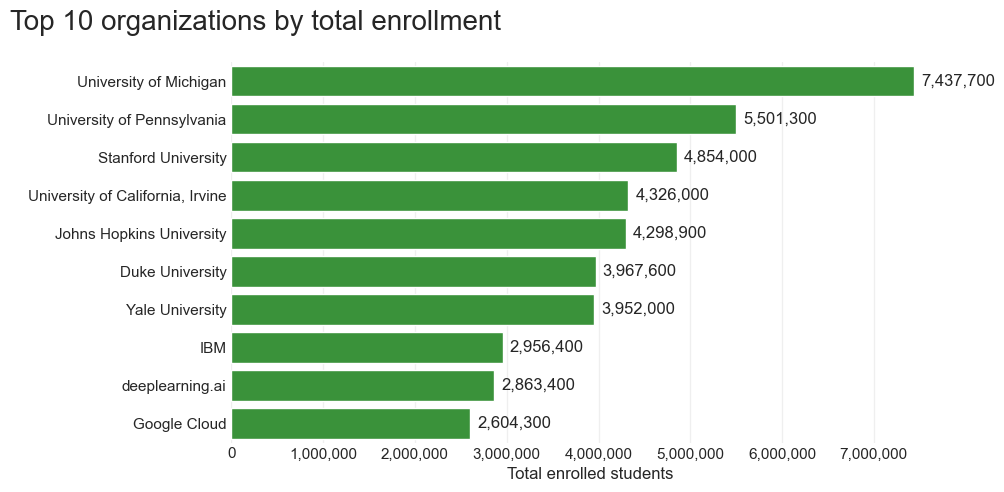

In [ ]:
q5_plot_df = q5_org_enroll_top.reset_index(name="total_enrolled")

plt.figure(figsize=(10,5))
sns.barplot(
    data=q5_plot_df,
    y="course_organization",
    x="total_enrolled",
    order=q5_org_enroll_top.index.astype(str),
    color="#2ca02c"
)

ax = plt.gca()
for p in ax.patches:
    val = p.get_width()
    ax.annotate(f"{val:,.0f}",
                (val, p.get_y() + p.get_height()/2),
                xytext=(5, 0),
                textcoords="offset points",
                va="center")

plt.suptitle("Top 10 organizations by total enrollment", fontsize=20, x=0, ha="left")
plt.xlabel("Total enrolled students")
plt.ylabel("")
ax.grid(axis="x", which="major", alpha=0.3)
ax.grid(axis="y", visible=False)
ax.tick_params(axis="both", length=0)
ax.ticklabel_format(style="plain", axis="x")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
sns.despine(ax=ax, left=True, bottom=True)
plt.tight_layout()
plt.show()


>**Result:** University of Michigan leads with 7,437,700 total enrollments, followed by University of Pennsylvania (5,501,300) and Stanford University (4,854,000).<br>
>**Meaning:** Few organizations appear here that weren't in the course count Top 10, like Stanford University and deeplearning.ai, meaning fewer courses can still be in high demmand. It's useful for understanding what's popular and what characteristics drives those high-demand courses in deeper analysis
---

> **Goal:** Identify organizations whose courses attract the most learners per course (using median)

In [ ]:
q6_min_courses = 5
q6_top_n = 10

q6_org_top = (
    df.groupby("course_organization", observed=False)["students_enrolled_parsed"]
      .agg(courses="count", median_enroll="median", mean_enroll="mean")
      .query("courses >= @q6_min_courses")
      .sort_values("median_enroll", ascending=False)
      .head(q6_top_n)
      .round(0)
)

q6_org_top


,courses,median_enroll,mean_enroll
course_organization,,,
University of California San Diego,9,150000.0,129556.0
Duke University,28,135000.0,141700.0
Wesleyan University,5,120000.0,118600.0
University of Washington,5,120000.0,167400.0
IBM,22,110000.0,134382.0
The Museum of Modern Art,6,99500.0,133167.0
Georgia Institute of Technology,10,98500.0,181300.0
deeplearning.ai,16,98000.0,178962.0
Arizona State University,7,81000.0,84214.0


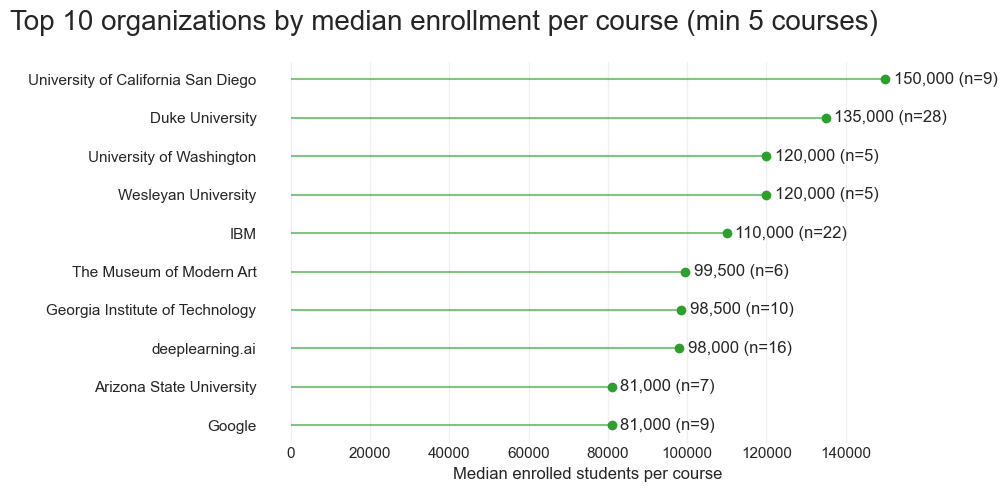

In [ ]:
q6_plot_df = q6_org_top.sort_values("median_enroll", ascending=True).reset_index()

plt.figure(figsize=(10,5))
ax = plt.gca()

ax.hlines(y=q6_plot_df["course_organization"], xmin=0, xmax=q6_plot_df["median_enroll"], alpha=0.6, color = "#2ca02c")
ax.plot(q6_plot_df["median_enroll"], q6_plot_df["course_organization"], "o", color = "#2ca02c")

for x, y, n in zip(q6_plot_df["median_enroll"], q6_plot_df["course_organization"], q6_plot_df["courses"]):
    ax.annotate(f"{x:,.0f} (n={n})", (x, y), xytext=(6, 0), textcoords="offset points", va="center")

plt.suptitle(f"Top {q6_top_n} organizations by median enrollment per course (min {q6_min_courses} courses)",
             fontsize=20, x=0, ha="left")
plt.xlabel("Median enrolled students per course")
plt.ylabel("")
ax.grid(axis="x", which="major", alpha=0.3)
ax.grid(axis="y", visible=False)
ax.tick_params(axis="both", length=0)
sns.despine(ax=ax, left=True, bottom=True)
plt.tight_layout()
plt.show()


>**Result:** With minimum of 5 courses, top organizations by median enrollment per course are University of California San Diego (150k, n=9) and Duke University (135k, n=28). Other are from 98k to 120k median enrollment per course<br>
>**Meaning:** This ranking highlights organizations that produce high-demand courses, not those with the highest enrollment
---

> **Goal:** Check whether course ratings vary across difficulty levels

In [ ]:
q7_rating_by_diff = (
    df.groupby("course_difficulty", observed=False)["course_rating"]
      .agg(count="count", mean="mean", median="median", std="std")
      .reindex(diff_order)
      .round(2)
)

q7_rating_by_diff


,count,mean,median,std
course_difficulty,,,,
Beginner,487,4.68,4.7,0.14
Intermediate,198,4.65,4.7,0.19
Mixed,187,4.71,4.8,0.17
Advanced,19,4.60,4.7,0.19


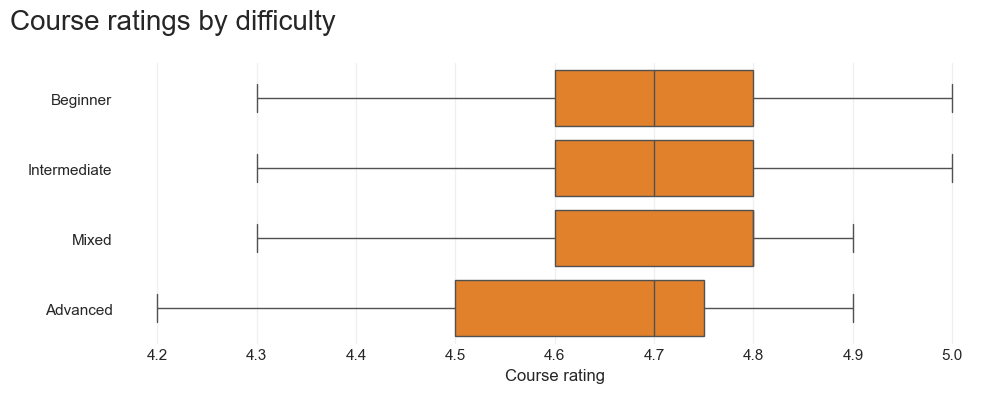

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(
    data=df,
    y="course_difficulty",
    x="course_rating",
    order=diff_order,
    showfliers=False,
    color ="#ff7f0e"
)

plt.suptitle("Course ratings by difficulty", fontsize=20, x=0, ha="left")
plt.xlabel("Course rating")
plt.ylabel("")

ax = plt.gca()
ax.grid(axis="x", which="major", alpha=0.3)
ax.grid(axis="y", visible=False)
ax.tick_params(axis="both", length=0)
sns.despine(ax=ax, left=True, bottom=True)

plt.tight_layout()
plt.show()


>**Result:** Average ratings are similar across groups: Mixed (mean 4.71) is the highest, followed by Beginner (4.68) and Intermediate (4.65), while Advanced with 4.60 is the lowest<br>
>**Meaning:** Difficulty doesn't seem to stongly affect ratings in this dataset - they're high regardless of level. The "Advanced" group is only 19 courses, so its slightly lower mean shouldn't be treated as a strong conclusion.
---

> **Goal:** Check whether course popularity (enrollment) is associated with course rating

In [ ]:
df[["course_rating", "students_enrolled_parsed"]].corr(method="spearman")


,course_rating,students_enrolled_parsed
course_rating,1.000000,0.026831
students_enrolled_parsed,0.026831,1.000000


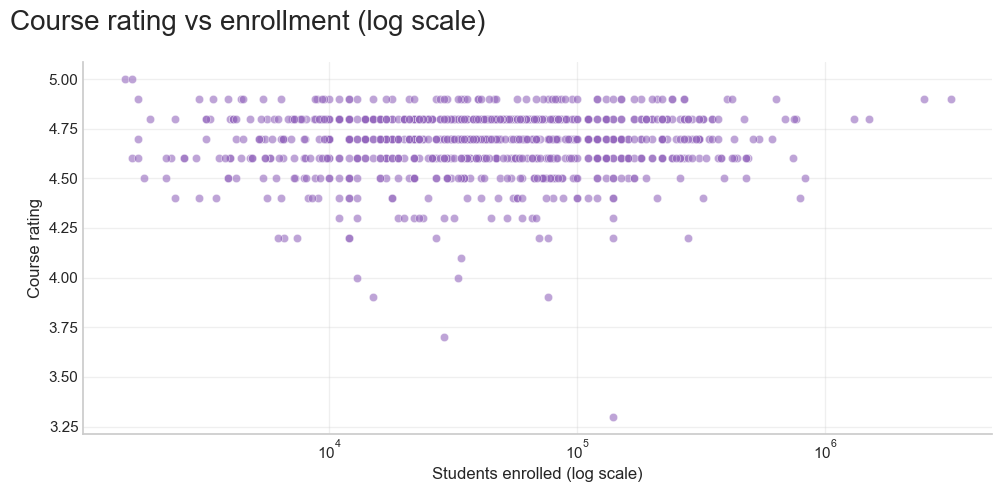

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=df,
    x="students_enrolled_parsed",
    y="course_rating",
    alpha=0.6,
    color="#9467bd"
)

plt.xscale("log")
plt.suptitle("Course rating vs enrollment (log scale)", fontsize=20, x=0, ha="left")
plt.xlabel("Students enrolled (log scale)")
plt.ylabel("Course rating")

ax = plt.gca()
ax.grid(axis="both", which="major", alpha=0.3)
ax.tick_params(axis="both", length=0)
sns.despine(ax=ax)

plt.tight_layout()
plt.show()


>**Result:** Correlation between course_rating and students_enrolled_parsed is 0.0268, which is very close to zero. The scatter plot also shows ratings clustered high across all enrollment levels.<br>
>**Meaning:** In this dataset, more enrolled courses are not consistently higher-rated or vice versa. Popularity and rating seems mostly independent, so enrollment likely depends on other factors (marketing, topic, brand, etc.)

---
### Key insights
---

- **Courses** dominate the catalog with 65.3%, **specializations** 33.3 and **professional** certificates only 1.3%
- **Professional Certificates** have the highest median enrollment **(~145k)**, but **very small sample group**. **Courses** are at **~43k** and **specializations with ~38k** are fairly similar
- The courses catalog is beginner-heavy. **Beginner** courses are 54.7%, while **advanced** is just 2.1%
- Courses **supply is fairly distributed**, no organization dominates by volume. The **top publisher - University of Pennsylvania** contributes 6.6% of total courses
- **Ratings are high** across all difficulty levels, means are around **4.6-4.71**
- Demand is not equal supply, organizations like **UC Michigan with ~7.44M** enrollments, **UC Pennsylvania ~5.50M** and **Stanford ~4.85M** differ from the ones publishing the most courses
- Popularity and rating are barely related. **Correlation between rating and enrollment is ~0.027**


---
### Suggested improvements/limitations
---

- This is a snapshot of 2020-05-25 Kaggle dataset, so it **may not represent current coursera situation**
- The dataset has **few features**, adding more features like language, category, duration, price, reviews **would likely explain enrollment patterns better**
- Some **groups are very small** (professional certificates, advanced difficulty), more data would make conclusions more reliable
- **Ratings are high and clustered**, more features or data would help interpret ratings more fairly